<a href="https://www.kaggle.com/code/rohankasodariya/heart-disease-prediction?scriptVersionId=179728363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-diagnosis-dataset/dataset_heart.csv


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [4]:
df = pd.read_csv("/kaggle/input/heart-disease-diagnosis-dataset/dataset_heart.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting blood pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting blood sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting electrocardiographic results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
max heart rate,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise induced angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


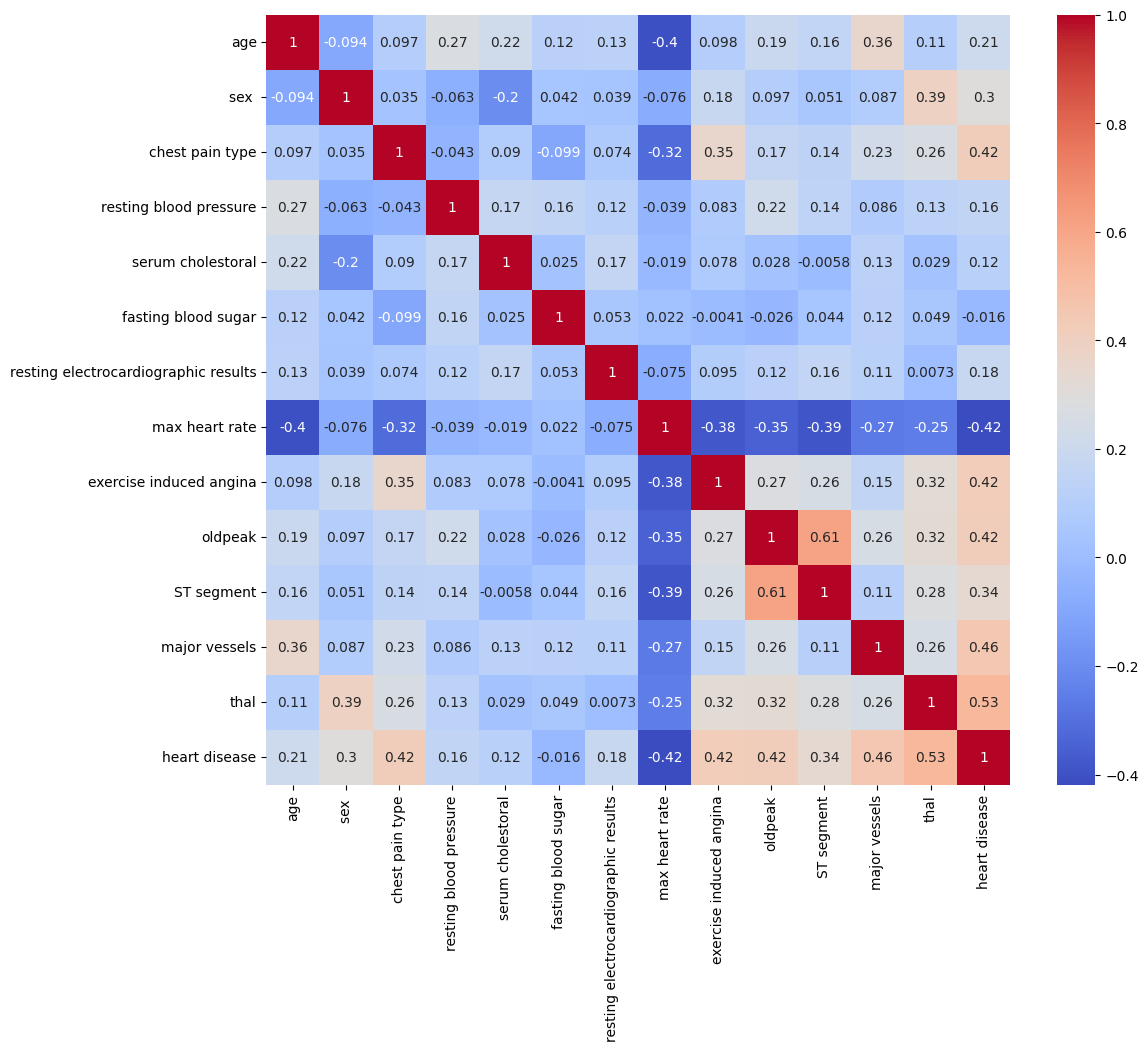

In [10]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [33]:
df['heart disease'].value_counts()

heart disease
1.0    150
2.0    120
Name: count, dtype: int64

In [36]:
df['heart disease'] = df['heart disease'].replace({1.0: 0,2.0: 1})

In [37]:
df['heart disease'].value_counts()

heart disease
0.0    150
1.0    120
Name: count, dtype: int64

# Handling Outliers

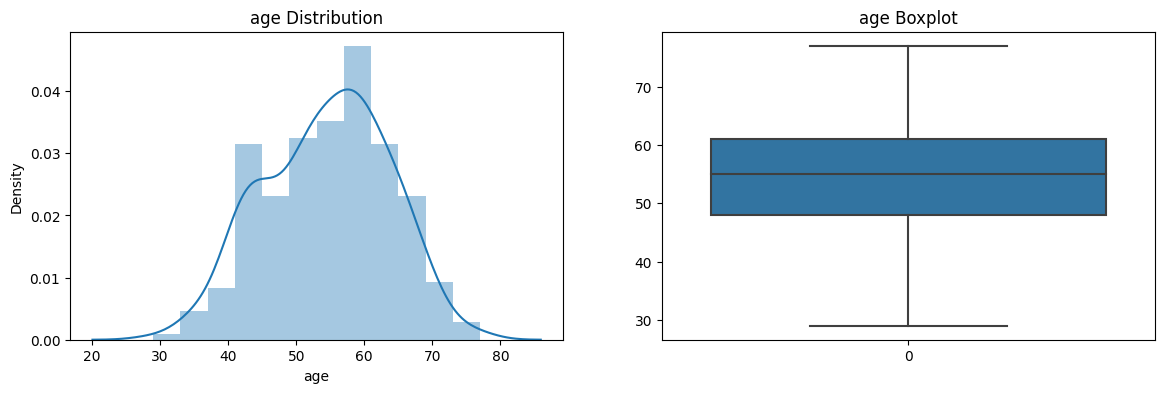

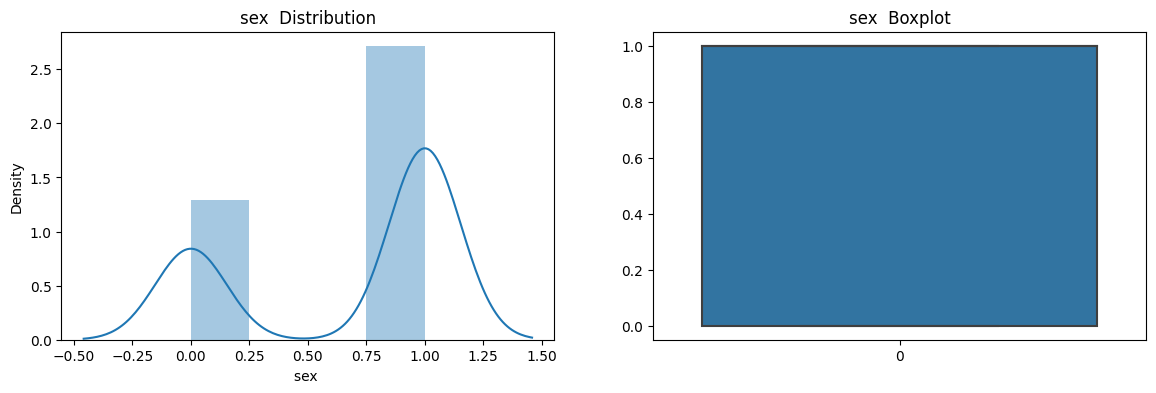

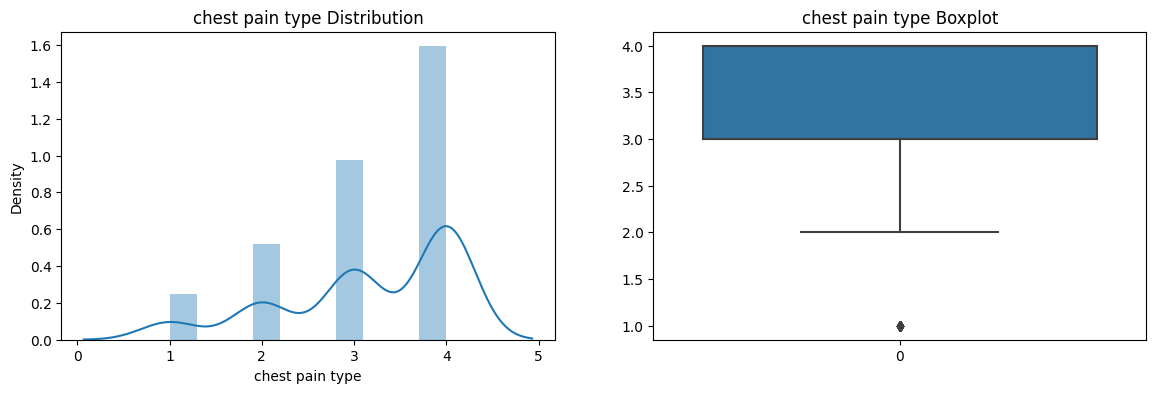

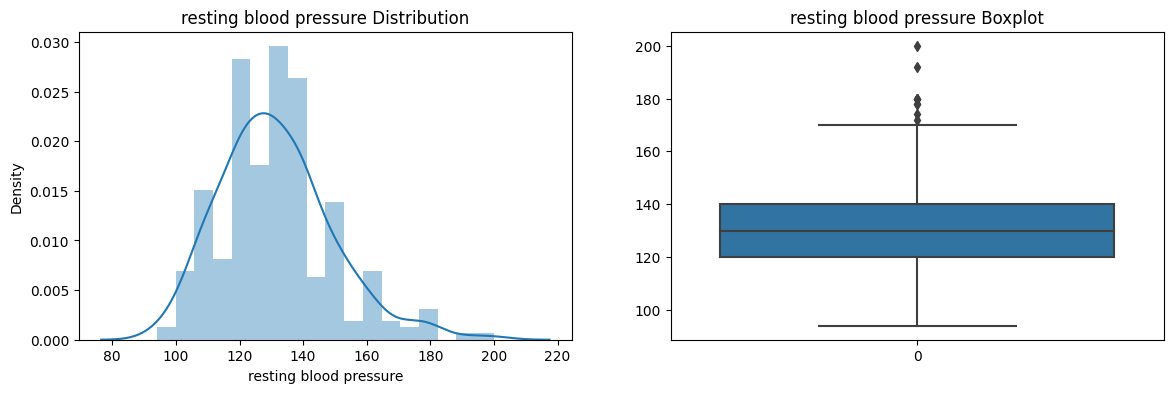

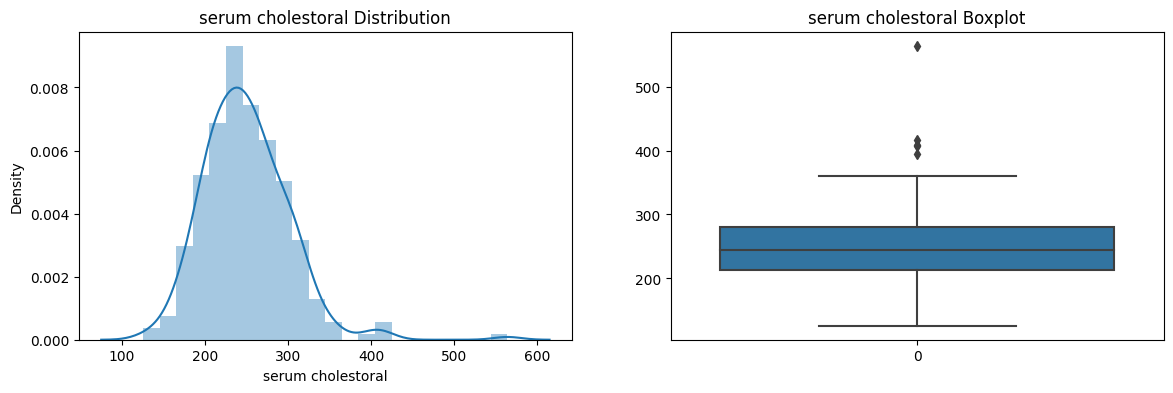

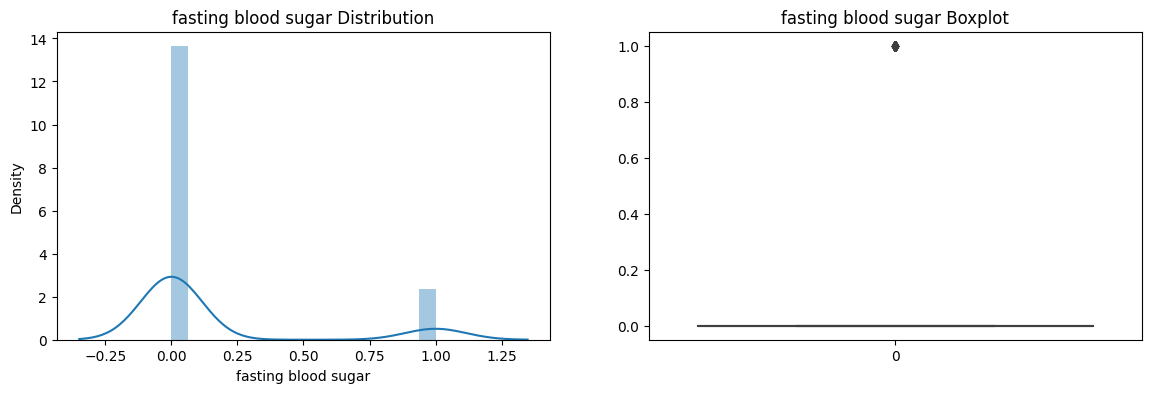

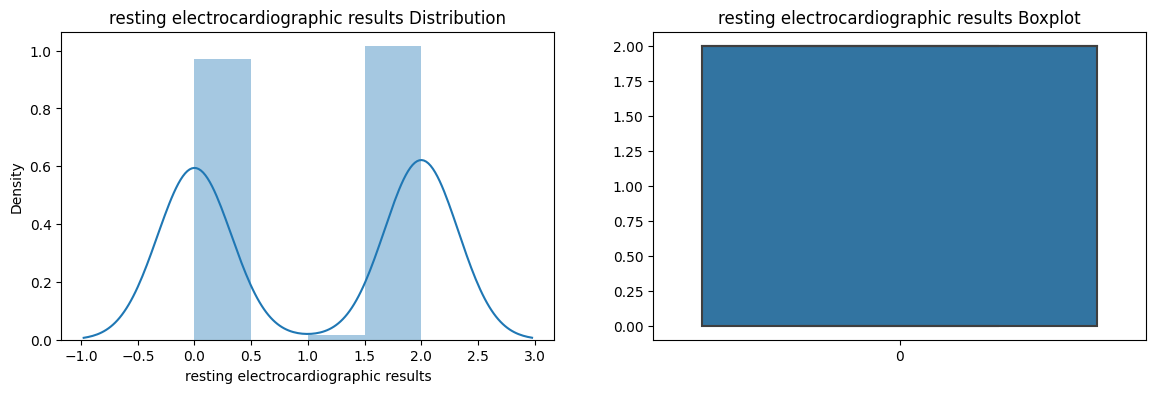

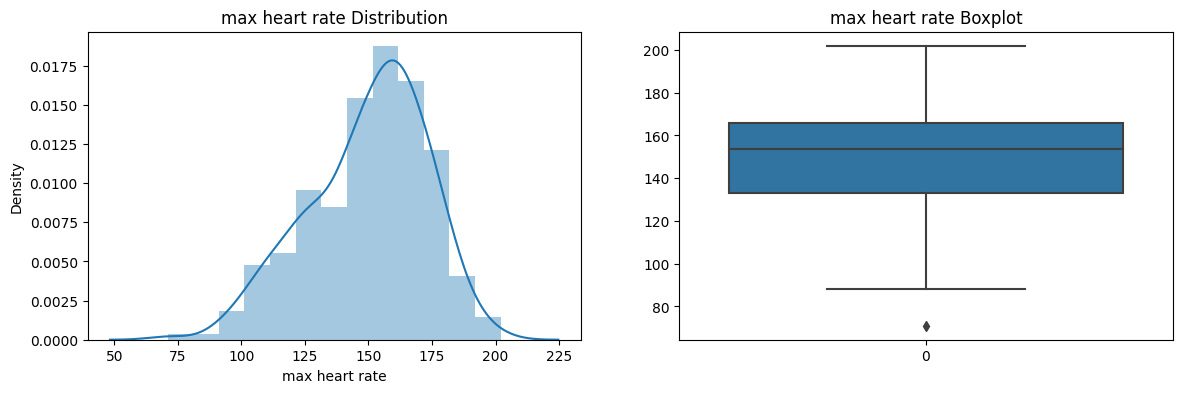

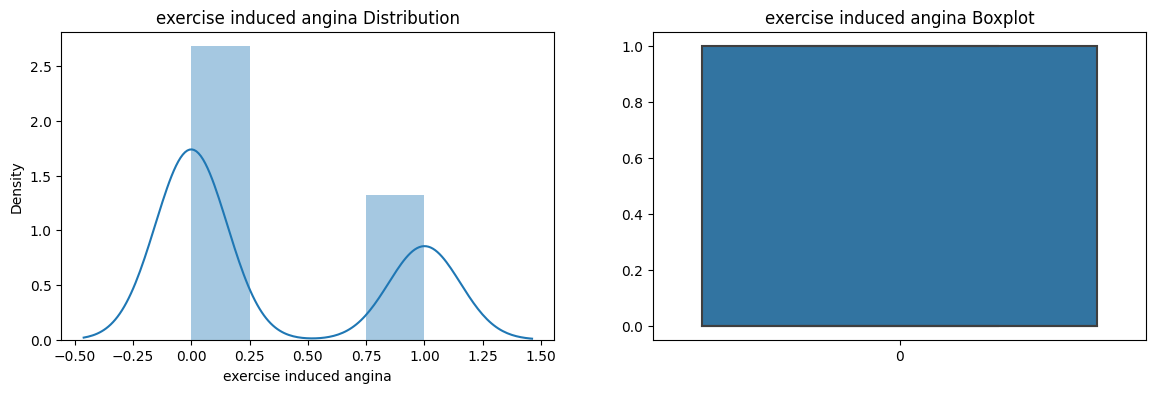

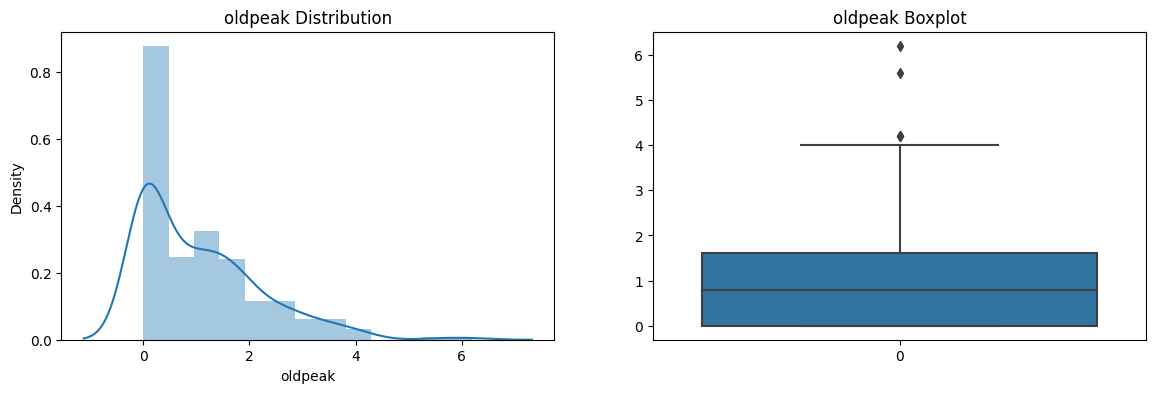

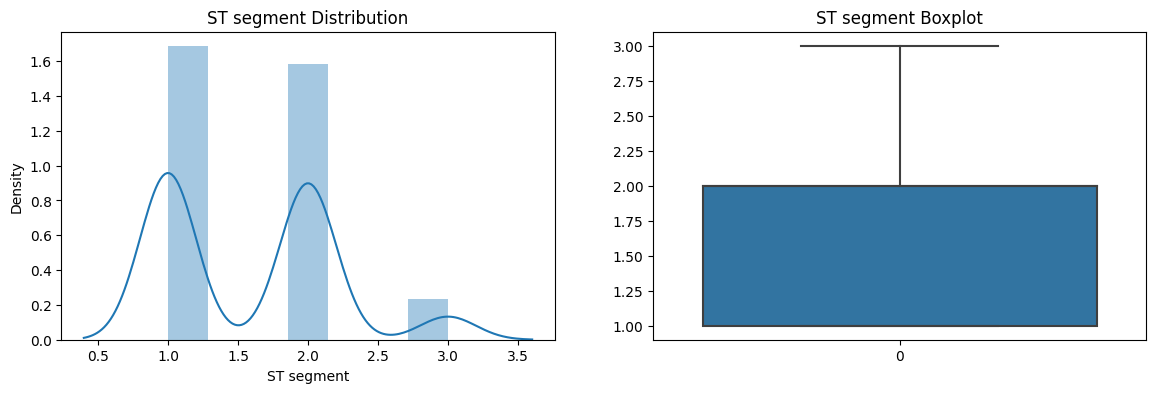

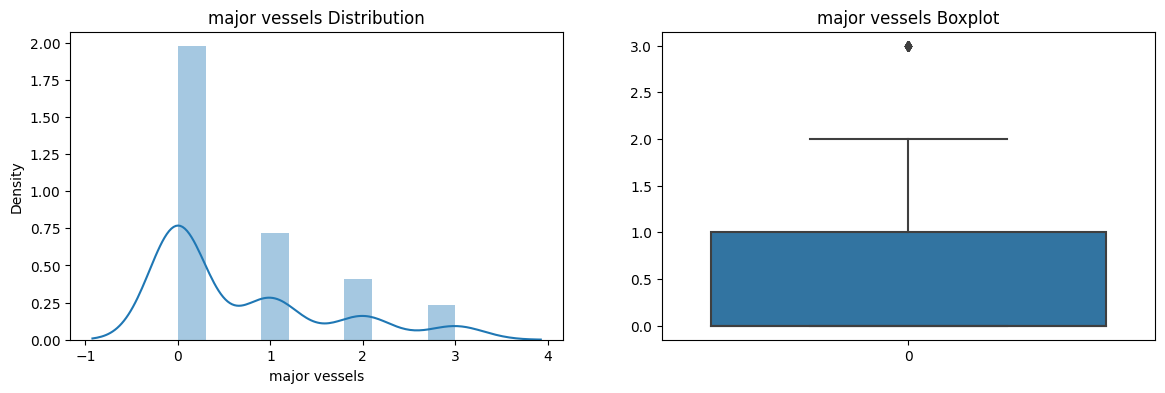

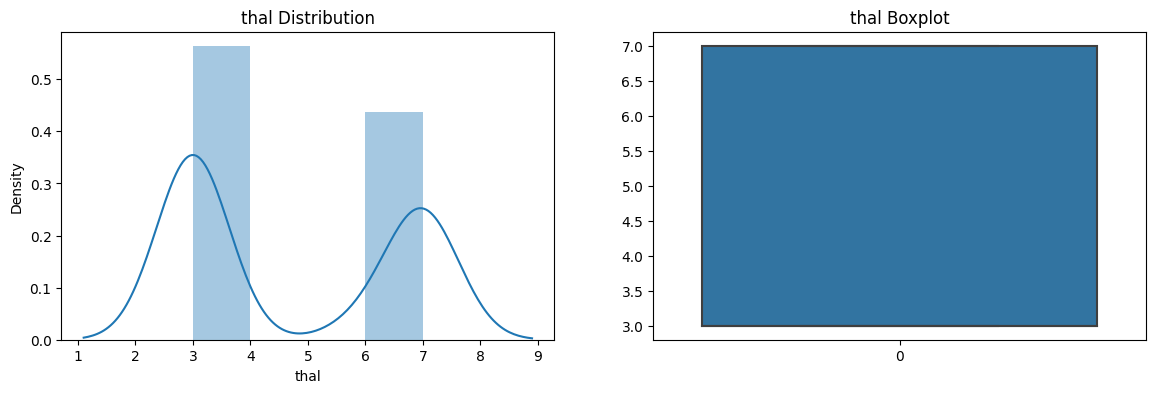

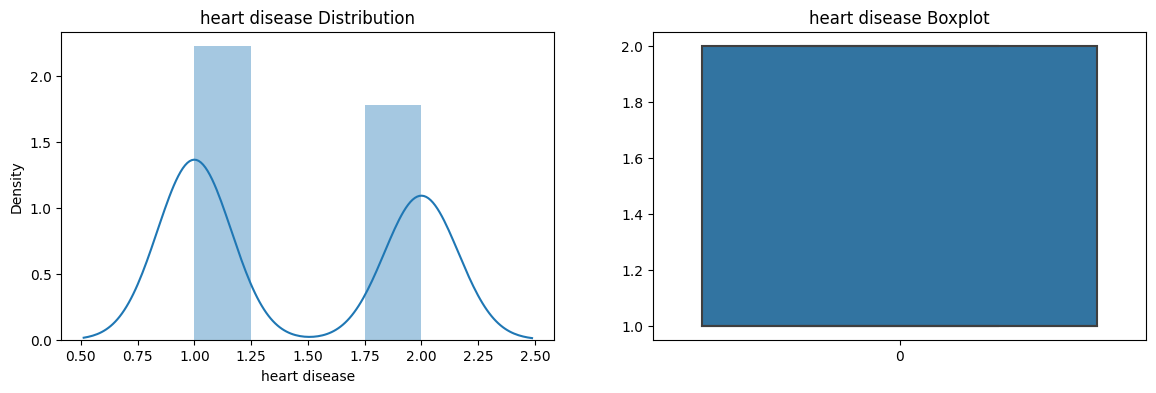

In [17]:
for col in df.columns:
    plt.figure(figsize=(14,4))
    
    # First subplot: Distribution plot
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title(f'{col} Distribution')
    
    # Second subplot: Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'{col} Boxplot')
    
    # Show the plots
    plt.show()

# Train_test_split

In [38]:
X = df.drop('heart disease', axis = 1)
y = df['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [39]:
models = {
    "DesicsionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [40]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cl_report = classification_report(y_test,y_pred)
    print(f'Classification Report for {name}: \n \n {cl_report} ')

Classification Report for DesicsionTreeClassifier: 
 
               precision    recall  f1-score   support

         0.0       0.81      0.64      0.71        33
         1.0       0.57      0.76      0.65        21

    accuracy                           0.69        54
   macro avg       0.69      0.70      0.68        54
weighted avg       0.72      0.69      0.69        54
 
Classification Report for RandomForestClassifier: 
 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        33
         1.0       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54
 
Classification Report for XGBClassifier: 
 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        33
         1.0       0.79      0.71      0.75        21

    accuracy              

# Applying Cross-Validation

In [43]:
for name,model in models.items():
    scores = cross_val_score(model,X,y,cv = 5, scoring = 'accuracy')
    print(f'{name} : {model},{scores.mean()}')

DesicsionTreeClassifier : DecisionTreeClassifier(),0.7407407407407408
RandomForestClassifier : RandomForestClassifier(),0.8296296296296297
XGBClassifier : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),0.7814814814814814


# Hyperparameter Tuning

In [50]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth': [None, 10,20]
}

grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv = 5, scoring = 'accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [51]:
rfc = RandomForestClassifier(max_depth= 10, n_estimators= 200)
rfc.fit(X_train,y_train)
rfc_y_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        33
         1.0       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54

